In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
directory = '/Users/chuamelia/Google Drive/Fall 2019/\
Introduction to Data Science/Term Project/\
Group Term Project/YouTube Video View Analysis/'

def save_obj(obj, fname):
    # This writes out a python object as a pickle.
    with open(directory + fname + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(fname):
    # This loads the pickled object.
    with open(directory + fname + '.pkl', 'rb') as f:
        return pickle.load(f)      

In [3]:
def getViralIndicator(value):
    if value >= 1000000:
        return 1
    else:
        return 0

dummies = pd.read_csv(directory + 'data/tags_as_dummies_comma.csv',sep=',', index_col=0, low_memory=False)    
dummies['viralIndicator'] = dummies['viewCount'].apply(lambda x:  getViralIndicator(x))

exclude = ['viralIndicator', 'videoId', 'viewCount', 'logViewCount','video','buzzfeedvideo','buzzfeed']
feature_names = [col for col in dummies.columns if col not in exclude]

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text

clf = DecisionTreeClassifier(criterion='entropy')

x = dummies[feature_names]
y = dummies['viralIndicator']

cross_val_score(clf, x, y, cv=10)
model_new = clf.fit(x, y)

In [4]:
model_new = load_obj('/data/dt_bzfd_removed')

In [5]:
feature_names = [col for col in dummies.columns if col not in exclude]
feature_importance = list(model_new.feature_importances_)

f_rank = pd.DataFrame\
.from_dict({'features': feature_names, 
            'importance': feature_importance})\
.sort_values(by='importance', ascending=True)

In [6]:
f_rank[ f_rank['importance'] > 0.003]

,features,importance
25751,creep,0.003027
532,americans,0.003091
3001,comedy,0.003111
5579,fun,0.003120
3859,dinner,0.003247
5525,friends,0.003367
5417,forthefirsttime,0.003425
2515,challenge,0.003964
8557,love,0.004017
13442,test,0.004135


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

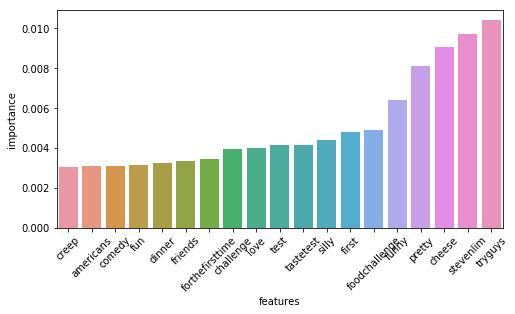

In [7]:
%matplotlib inline 
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x='features', y='importance', data=f_rank[f_rank['importance'] > 0.003])
plt.xticks(rotation=45)

In [8]:
f = f_rank[f_rank['importance'] != 0]['features'].tolist()

f_ac = f[1001:]
# save_obj(f_ac, 'ac_tags_to_topic')

f_dh = f[:500]
# save_obj(f_dh, 'dh_tags_to_topic')

f_cj = f[500:1001]
# save_obj(f_cj, 'cj_tags_to_topic')

In [9]:
len(f)

1358